<a href="https://colab.research.google.com/github/HarryGateaux/PyTorchLearning/blob/master/SimpleConvAutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
from torchvision import datasets, transforms
import torch.nn as nn
import torch.nn.functional as F
import torchvision

In [2]:
#sets up colab to access/save data to google drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

from pathlib import Path

root_dir = Path("/content/gdrive/My Drive/Colab Notebooks/")
data_dir = root_dir/'data'


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


Data Pipeline

In [16]:
transform = transforms.Compose([transforms.ToTensor(),  transforms.Normalize((0.4914, 0.4822, 0.4466), (0.247, 0.243, 0.261))])

trainset = datasets.CIFAR10(root = data_dir, transform = transform, download = True)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=256)

Files already downloaded and verified


Show Images in Batch

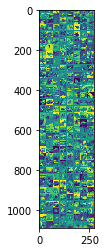

In [18]:
def show_images(images):
    images = torchvision.utils.make_grid(images)
    show_image(images[0])

def show_image(img):
    plt.imshow(img)
    plt.show()

dataiter = iter(trainloader)
images, labels = dataiter.next()
show_images(images)

Creating AutoEncoder

In [0]:
class AutoEncoder(nn.Module):

  def __init__(self):

    super().__init__()

    self.conv1 = nn.Conv2d(3, 6, 5)
    self.conv2 = nn.Conv2d(6, 64, 3)

    self.deConv2 = nn.ConvTranspose2d(64, 6, 3)
    self.deConv1 = nn.ConvTranspose2d(6, 3, 5)

    self.relu = nn.ReLU()

    self.pool = nn.MaxPool2d(2, 2)

  def forward(self, x):

    x = self.relu(self.conv1(x))
    x = self.relu(self.conv2(x))

    x = self.relu(self.deConv2(x))
    x = self.relu(self.deConv1(x))

    return x

Model Settings


In [6]:
model = AutoEncoder()

epochs = 2
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

model
len(trainloader)

196

Training the Model

In [7]:
for e in range(epochs):
  epoch_loss = 0
  count = 0
  for images, _ in trainloader:

    optimizer.zero_grad()
    y_hats = model(images)
    loss = criterion(y_hats, images)
    epoch_loss += loss
    loss.backward()
    optimizer.step()
  print(f"epoch : {e}  epoch loss : {epoch_loss/len(trainloader)}")
 

epoch : 0  epoch loss : 0.6080697774887085
epoch : 1  epoch loss : 0.5193506479263306


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


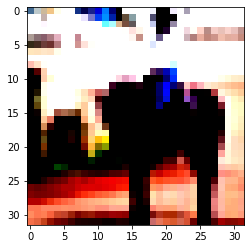

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


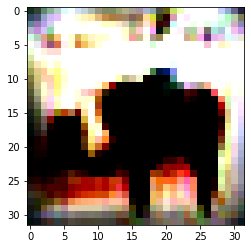

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


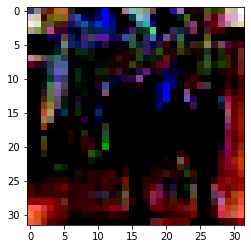

In [21]:
import matplotlib.pyplot as plt
import numpy as np

#pick random image from trainset
image = trainset[11][0]

#function to plot tensor as image
def show_tensor_image(torch_tensor):

    plt.imshow(np.transpose(torch_tensor.numpy(), [1,2,0]))
    plt.show()

#get the image after model is applied
reconstructed_image = model(image[None]) #unsqueeze first dim

#calculate the difference between reconstruction and actual
diff = image - model_image.detach().squeeze()

#display them all
show_tensor_image(image)
show_torch_image(reconstructed_image.detach().squeeze())
show_torch_image(diff)